In [1]:
import sys
sys.path.append('../src')

In [ ]:
from ingestion.data_loader import fetch_stock_data, simulate_cash_inflow
from processing.data_cleaner import clean_stock_data
from forecasting.prophet_forecaster import forecast_cash_inflow, plot_forecast, export_forecast_to_csv

# Step 1: Load data
df = fetch_stock_data('AAPL', '2020-01-01', '2024-12-31')
df = clean_stock_data(df)
df = simulate_cash_inflow(df)

# Step 2: Forecast
forecast, model = forecast_cash_inflow(df, periods=30)

# Step 3: Plot
plot_forecast(forecast, df_actual=df)

# Step 4: Export
export_forecast_to_csv(forecast, "../data/forecast/aapl_forecast_30d.csv")

/home/oxy/repo/ar-cashflow-forecasting/oxy/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] Fetching stock data for AAPL from 2020-01-01 to 2024-12-31


/home/oxy/repo/ar-cashflow-forecasting/notebooks/../src/ingestion/data_loader.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
22:16:10 - cmdstanpy - INFO - Chain [1] start processing


[DEBUG] Flattened columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
[DEBUG] Incoming columns: ['Date', 'Close', 'Volume']
[DEBUG] Mapped: Date -> date, Close -> close, Volume -> volume


22:16:10 - cmdstanpy - INFO - Chain [1] done processing


TypeError: 'Prophet' object is not subscriptable

<Figure size 1200x600 with 0 Axes>

21:58:38 - cmdstanpy - INFO - Chain [1] start processing
21:58:38 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics:
{'MAPE': 23.19, 'RMSE': np.float64(3561901662.25)}


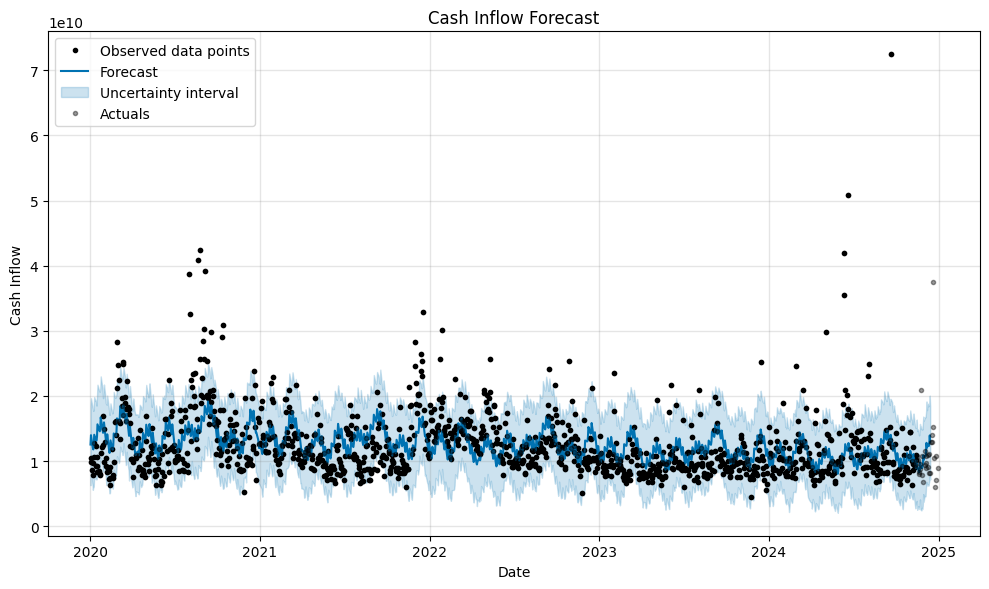

In [5]:
from evaluation.backtest import backtest_prophet

metrics, forecast, model = backtest_prophet(df, forecast_days=30)
print("Evaluation Metrics:")
print(metrics)

plot_forecast(model, forecast, df)